## Método de clasificación _K-means Clustering_

No supervisado

16/08/2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d # Módulo de geometría computacional para calcular y visualizar diagramas de Voronoi

In [2]:
np.random.seed(23)
X = np.random.rand(100, 2) 
X.shape

(100, 2)

In [3]:
X.size

200

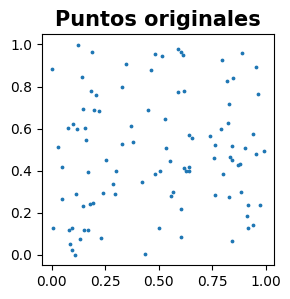

In [4]:
plt.figure( figsize = (3,3) )
plt.scatter( X[:,0], X[:, 1], s = 3)
plt.title('Puntos originales', size = 15, weight = 'bold')
plt.show()


### Implemento el modelo de KMeans

In [5]:
# Número de clusters
n_clusters = 5

# Implementación del modelo  
kmeans = KMeans( n_clusters= n_clusters, n_init= 20, 
                 random_state= 10 ).fit(X)

# Obtener las etiquetas de los clusters para cada punto
labels = kmeans.labels_

# Centroides de los clusters
centroides = kmeans.cluster_centers_

In [6]:
labels

array([4, 3, 1, 2, 0, 1, 3, 4, 3, 2, 3, 2, 3, 0, 3, 4, 1, 2, 3, 1, 4, 0,
       2, 0, 4, 3, 4, 2, 4, 2, 3, 3, 4, 2, 3, 1, 3, 1, 2, 1, 3, 2, 0, 0,
       3, 3, 1, 2, 2, 3, 0, 2, 2, 0, 1, 4, 3, 0, 4, 0, 0, 0, 2, 4, 2, 0,
       1, 2, 1, 3, 1, 4, 0, 1, 1, 3, 4, 2, 2, 0, 1, 2, 1, 1, 3, 2, 0, 1,
       4, 2, 0, 4, 2, 1, 0, 1, 3, 3, 3, 3])

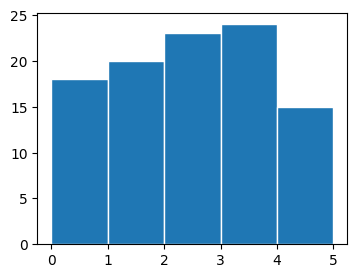

In [7]:
plt.figure( figsize = (4,3) )
plt.hist(labels, bins= 5, range = (0, 5), edgecolor = 'white')
plt.show()

In [8]:
centroides

array([[0.55925437, 0.39024758],
       [0.19391709, 0.71552106],
       [0.16787948, 0.20444998],
       [0.86268872, 0.38997309],
       [0.70547547, 0.87718288]])

### Cálculo el diagrama de Voronoi

In [9]:
vor = Voronoi( centroides )
vor

**Gráficas**

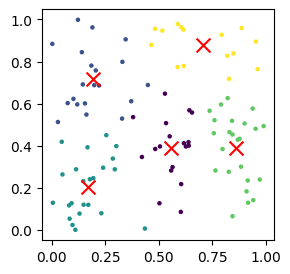

In [10]:
plt.figure( figsize = (3,3) )
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 5 )
for n in range(len(centroides)):
    plt.scatter( centroides[n, 0], centroides[n, 1], 
                marker= 'x', s = 100, c ='red' )
plt.show()

In [12]:
kmeans.predict([[0.5, 0.2]])

array([0])

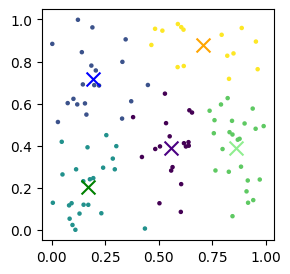

In [16]:
colors = ['indigo', 'blue', 'green', 'lightgreen', 'orange']
plt.figure( figsize = (3,3) )
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 5 )
for n in range(len(centroides)):
    plt.scatter( centroides[n, 0], centroides[n, 1], 
                marker= 'x', s = 100, c = colors[n] )
plt.show()

### Diagrama de Voronoi

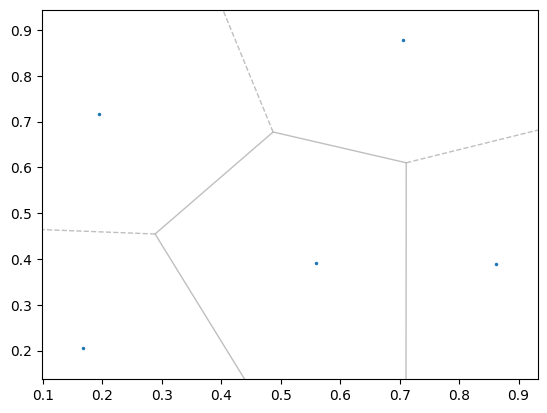

In [23]:
voronoi_plot_2d( vor, show_vertices =False, line_colors = 'grey',
                line_widh = 50, line_alpha = 0.5 , point_size = 3)
plt.show()

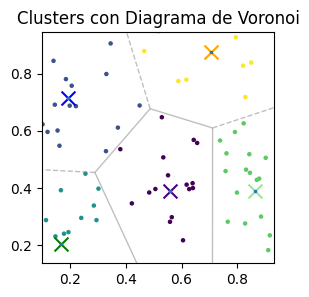

In [29]:
fig, ax = plt.subplots( figsize= (3,3))
voronoi_plot_2d( vor, ax = ax, show_vertices =False, line_colors = 'grey',
                line_widh = 50, line_alpha = 0.5 , point_size = 3)
ax.scatter(X[:, 0], X[:, 1], c = labels, s = 5 )
ax.set_title('Clusters con Diagrama de Voronoi')
for n in range(len(centroides)):
    ax.scatter( centroides[n, 0], centroides[n, 1], 
                marker= 'x', s = 100, c = colors[n] )
plt.show()

Uso generadores de nubes de puntos (blobs)

In [31]:
from sklearn.datasets import make_blobs # Generados de nube de puntos
import seaborn as sns

In [33]:
n_samples = 1500
random_state = 23
X, y = make_blobs( n_samples = n_samples, random_state = random_state)

In [34]:
X.shape

(1500, 2)

In [35]:
y.shape

(1500,)

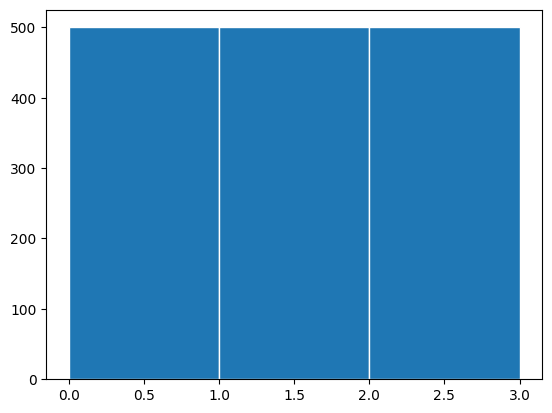

In [40]:
plt.hist(y, bins=3, range= (0, 3), edgecolor = 'white')
plt.show()

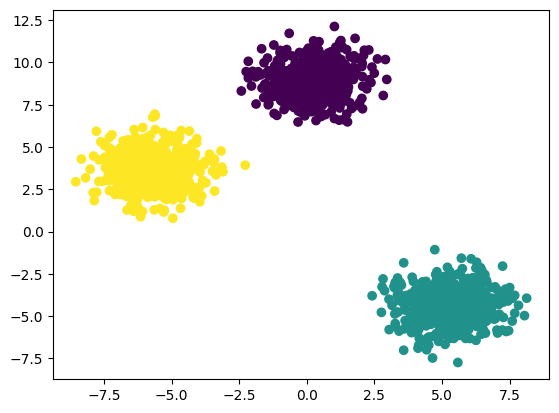

In [43]:
plt.scatter(X[:,0], X[:, 1], c = y)
plt.show()

In [52]:
# Número de clusters
n_clusters = 3

# Implementación del modelo  
kmeans = KMeans( n_clusters= n_clusters, n_init= 20, 
                 random_state= 10 ).fit(X)

# Obtener las etiquetas de los clusters para cada punto
labels = kmeans.labels_

# Centroides de los clusters
centroides = kmeans.cluster_centers_

vor = Voronoi( centroides )

In [53]:
centroides

array([[ 0.25144148,  8.90066736],
       [ 5.29884081, -4.3505235 ],
       [-5.66878002,  3.68344882]])

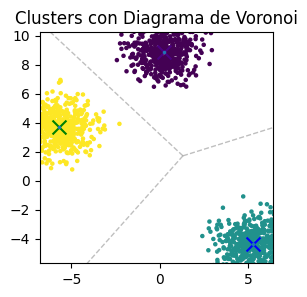

In [54]:
fig, ax = plt.subplots( figsize= (3,3))
voronoi_plot_2d( vor, ax = ax, show_vertices =False, line_colors = 'grey',
                line_widh = 50, line_alpha = 0.5 , point_size = 3)
ax.scatter(X[:, 0], X[:, 1], c = labels, s = 5 )
ax.set_title('Clusters con Diagrama de Voronoi')
for n in range(len(centroides)):
    ax.scatter( centroides[n, 0], centroides[n, 1], 
                marker= 'x', s = 100, c = colors[n] )
plt.show()

## Clase 17/08/2023

Modificaciones de los blobs

In [56]:
transformation = [[0.608, -0.636], [-0.408, 0.852]]
transformation

[[0.608, -0.636], [-0.408, 0.852]]

In [57]:
X.shape

(1500, 2)

In [59]:
np.dot(X, transformation).shape

(1500, 2)

In [60]:
X_t = np.dot(X, transformation) # X cambió

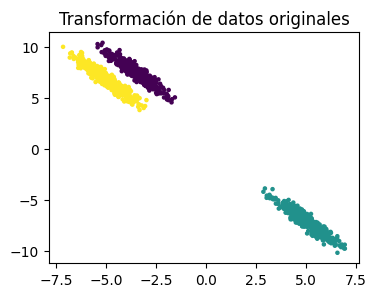

In [62]:
plt.figure( figsize = (4,3) )
plt.scatter(X_t[:, 0], X_t[:, 1], c = labels, s = 5 )
plt.title('Transformación de datos originales')
plt.show()

Considero el caso en que cada blob tiene una varianza diferente

In [65]:
X_v, y_v = make_blobs( n_samples = n_samples, random_state = random_state, cluster_std = [1,2.5,0.5])

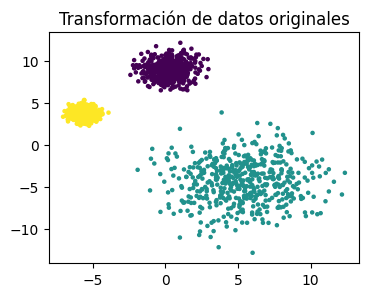

In [66]:
plt.figure( figsize = (4,3) )
plt.scatter(X_v[:, 0], X_v[:, 1], c = labels, s = 5 )
plt.title('Transformación de datos originales')
plt.show()

Selecciono una cantidad de puntos diferente para cada conjunto

In [69]:
X_f = np.vstack( (X[y == 0][:500], X [y == 1][:100], X[ y==2 ][:10]))
X_f

array([[-0.40359034,  8.61608908],
       [-0.90254593,  8.58605946],
       [-2.23956682,  9.45853981],
       ...,
       [-5.86153123,  5.49037248],
       [-3.94554617,  3.51075145],
       [-6.49672183,  3.75250289]])

In [72]:
y_f = [0] * 500 + [1] * 100 + [2]*10

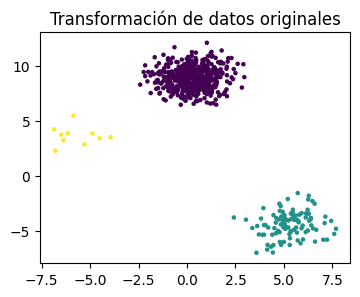

In [74]:
plt.figure( figsize = (4,3) )
plt.scatter(X_f[:, 0], X_f[:, 1], c = y_f, s = 5 )
plt.title('Transformación de datos originales')
plt.show()

In [75]:
y[:20]

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 2])

In [76]:
y == 1

array([ True, False, False, ..., False, False, False])

Gráfico conjunto de las nubes de puntos

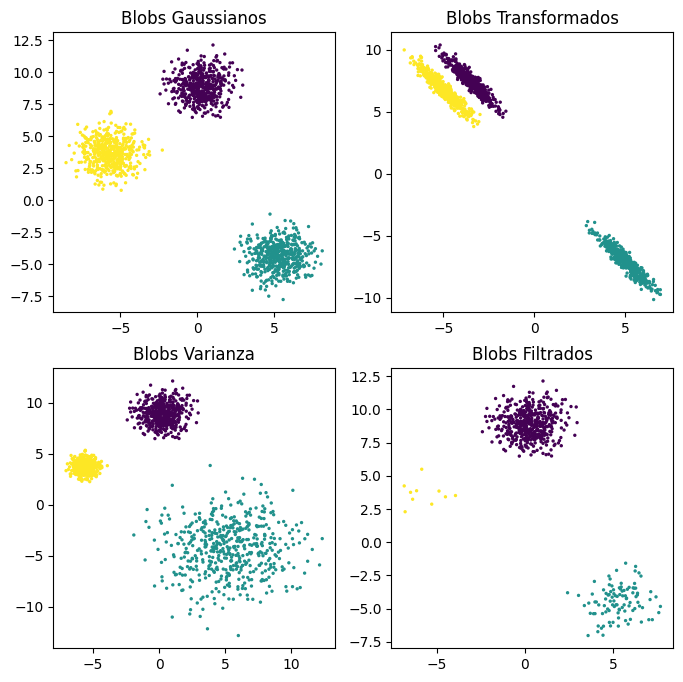

In [85]:
fig, axs = plt.subplots( nrows = 2, ncols = 2, figsize = (8,8))

axs[0,0].scatter(X[:, 0], X[:,1], c = y, s=2)
axs[0,0].set_title('Blobs Gaussianos')

axs[0,1].scatter(X_t[:, 0], X_t[:,1], c = y, s=2)
axs[0,1].set_title('Blobs Transformados')

axs[1,0].scatter(X_v[:, 0], X_v[:,1], c = y, s=2)
axs[1,0].set_title('Blobs Varianza')

axs[1,1].scatter(X_f[:, 0], X_f[:,1], c = y_f, s=2)
axs[1,1].set_title('Blobs Filtrados')

plt.show()

Para determinar el número de clusters conveniente se evalúan la **INERCIA**

**INERCIA**_ Es la suma de las distancias al cuadrado entre cada punto y su centroide más cercano, para todos los clústers

In [90]:
inercias = []

for n in range(1, 11):
    kmeans = KMeans(n_clusters = n, n_init = 10)
    kmeans.fit(X)
    inercias.append(round(kmeans.inertia_,2))

print(inercias)

[77716.85, 18588.59, 3021.5, 2654.21, 2331.25, 1981.28, 1755.77, 1559.01, 1364.71, 1251.94]


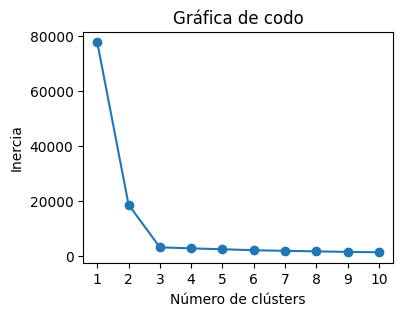

In [95]:
plt.figure( figsize= (4,3) )
plt.title('Gráfica de codo')
plt.plot(range(1, 11), inercias, '-o')
plt.xlabel('Número de clústers')
plt.ylabel('Inercia')
plt.xticks(range(1,11))
plt.show()

In [96]:
inercias

[77716.85,
 18588.59,
 3021.5,
 2654.21,
 2331.25,
 1981.28,
 1755.77,
 1559.01,
 1364.71,
 1251.94]